Jug A: 0L, Jug B: 0L



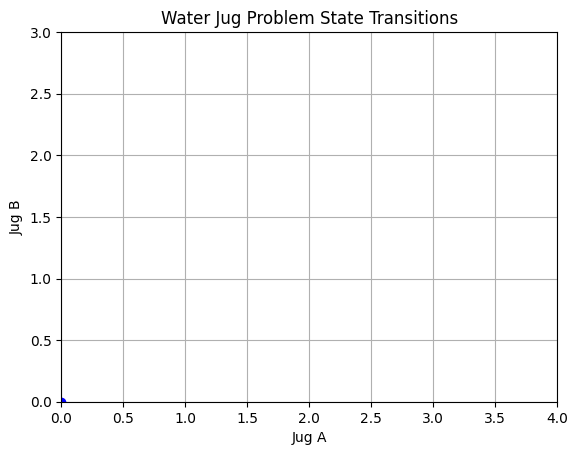

Possible Moves: [(4, 0), (0, 3), (0, 0), (0, 0), (0, 0), (0, 0)]
Invalid move. Try again.
Invalid move. Try again.
Invalid move. Try again.


In [ ]:
import math
import sys
import matplotlib.pyplot as plt
import time

sys.setrecursionlimit(1000)

class WaterJugsGame:
    def __init__(self, A, B, T):
        self.A, self.B, self.T = A, B, T
        self.state = (0, 0)
        self.moves = 0
        self.history = []

    def is_valid(self, state):
        x, y = state
        return 0 <= x <= self.A and 0 <= y <= self.B

    def is_goal(self, state):
        return state[0] == self.T or state[1] == self.T

    def get_possible_moves(self, state):
        x, y = state
        moves = [
            (self.A, y),  # Fill Jug A
            (x, self.B),  # Fill Jug B
            (0, y),  # Empty Jug A
            (x, 0),  # Empty Jug B
            (max(0, x - (self.B - y)), min(self.B, x + y)),  # Pour A -> B
            (min(self.A, x + y), max(0, y - (self.A - x)))   # Pour B -> A
        ]
        return [move for move in moves if self.is_valid(move)]

    def is_game_over(self):
        return self.is_goal(self.state) or len(self.get_possible_moves(self.state)) == 0

    def check_winner(self):
        if self.is_goal(self.state):
            return "Human Wins" if self.moves % 2 == 1 else "AI Wins"
        return "Draw" if self.is_game_over() else None

    def minimax(self, state, depth, alpha, beta, is_maximizing):
        if depth == 0 or self.is_goal(state):
            return 1 if self.moves % 2 == 1 else -1
        if len(self.get_possible_moves(state)) == 0:
            return 0

        if is_maximizing:
            max_eval = -math.inf
            for move in self.get_possible_moves(state):
                eval = self.minimax(move, depth - 1, alpha, beta, False)
                max_eval = max(max_eval, eval)
                alpha = max(alpha, eval)
                if beta <= alpha:
                    break
            return max_eval
        else:
            min_eval = math.inf
            for move in self.get_possible_moves(state):
                eval = self.minimax(move, depth - 1, alpha, beta, True)
                min_eval = min(min_eval, eval)
                beta = min(beta, eval)
                if beta <= alpha:
                    break
            return min_eval

    def best_move(self):
        best_score = -math.inf
        best_action = None

        for move in self.get_possible_moves(self.state):
            score = self.minimax(move, depth=5, alpha=-math.inf, beta=math.inf, is_maximizing=False)
            if score > best_score:
                best_score = score
                best_action = move

        return best_action

    def print_state(self):
        print(f"Jug A: {self.state[0]}L, Jug B: {self.state[1]}L\n")

    def visualize(self):
        self.history.append(self.state)
        plt.clf()
        x_vals = [s[0] for s in self.history]
        y_vals = [s[1] for s in self.history]
        plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='b')
        plt.xlim(0, self.A)
        plt.ylim(0, self.B)
        plt.xlabel("Jug A")
        plt.ylabel("Jug B")
        plt.title("Water Jug Problem State Transitions")
        plt.grid()
        plt.pause(0.5)

A = int(input("Enter capacity of Jug A: "))
B = int(input("Enter capacity of Jug B: "))
T = int(input("Enter target volume T: "))

game = WaterJugsGame(A, B, T)
plt.ion()

while True:
    game.print_state()
    game.visualize()

    if game.is_game_over():
        print(f"{game.check_winner()}! Game Over.")
        break

    possible_moves = game.get_possible_moves(game.state)
    print("Possible Moves:", possible_moves)

    while True:
        try:
            x, y = map(int, input("Enter your move as (x, y): ").split(','))
            if (x, y) in possible_moves:
                game.state = (x, y)
                game.moves += 1
                break
            else:
                print("Invalid move. Try again.")
        except ValueError:
            print("Invalid input format. Enter two numbers separated by a comma.")

    if game.is_game_over():
        game.print_state()
        print(f"{game.check_winner()}! Game Over.")
        break

    ai_move = game.best_move()
    if ai_move:
        print(f"AI chooses: {ai_move}")
        game.state = ai_move
        game.moves += 1
    else:
        print("No possible moves left. Game Over!")
        break

plt.ioff()
plt.show()
